# Senior Project
Ben Sizelove

Link to Data
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db

In [1]:
import numpy as np 
import csv
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import seaborn as sns
import matplotlib as mpl
import types
import pandas as pd

/Users/BenSizelove/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import types
import pandas as pd
df = pd.read_csv('SpotifyFeatures.csv')
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
df.size

4189050

In [4]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Exploration 

In [5]:
df.size

4189050

In [6]:
df.shape

(232725, 18)

In [7]:
#Checking For NA
df.isna().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

In [8]:
# Checking For Null Values
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [9]:
#Checking Data Types
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [10]:
#Checking Distribution of song Genres
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [11]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [12]:
#Checking number of unique values of each attribute
for col in df.columns.values:
    print(col,'\t',df[col].nunique())
    

genre 	 27
artist_name 	 14564
track_name 	 148615
track_id 	 176774
popularity 	 101
acousticness 	 4734
danceability 	 1295
duration_ms 	 70749
energy 	 2517
instrumentalness 	 5400
key 	 12
liveness 	 1732
loudness 	 27923
mode 	 2
speechiness 	 1641
tempo 	 78512
time_signature 	 5
valence 	 1692


In [13]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Visualization

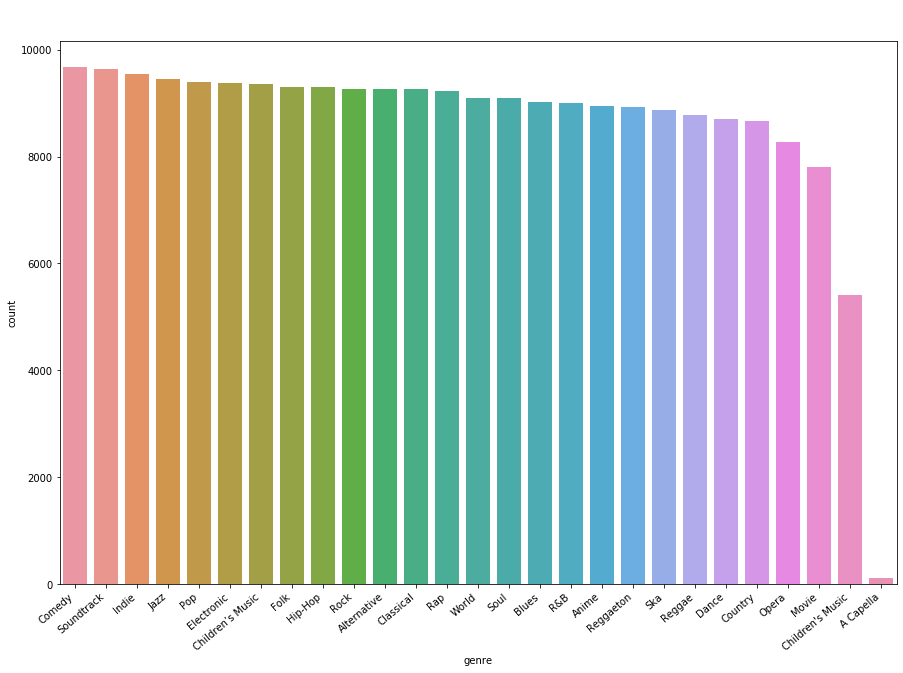

In [14]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='genre',
              data=df, 
             order=df['genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Genre",fontsize=35,color="white")
plt.show()

In [15]:
#Clearly there is not an equal number of songs in each genre so I will likely equal out distribution when running my model

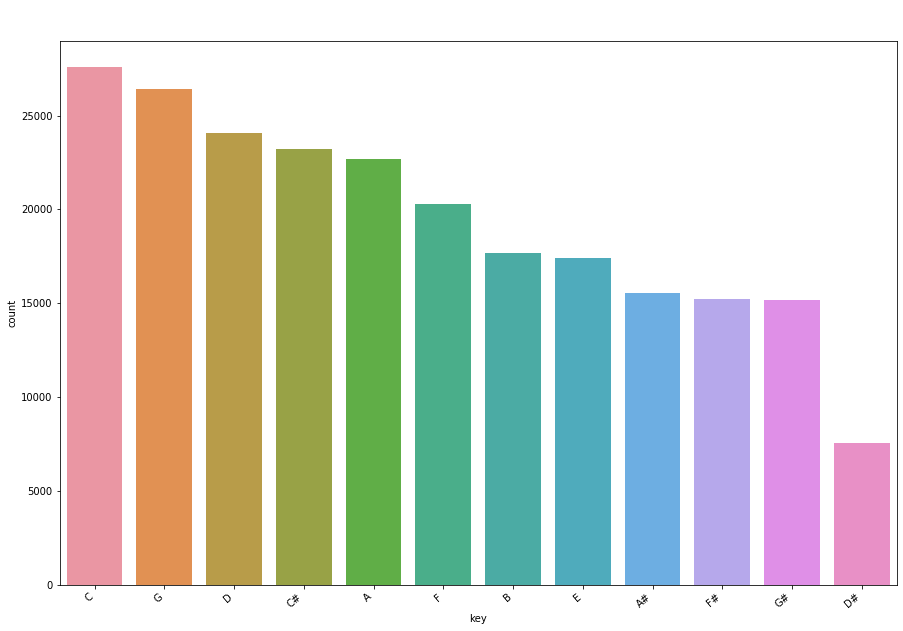

In [16]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='key',
              data=df, 
             order=df['key'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Genre",fontsize=35,color="white")
plt.show()

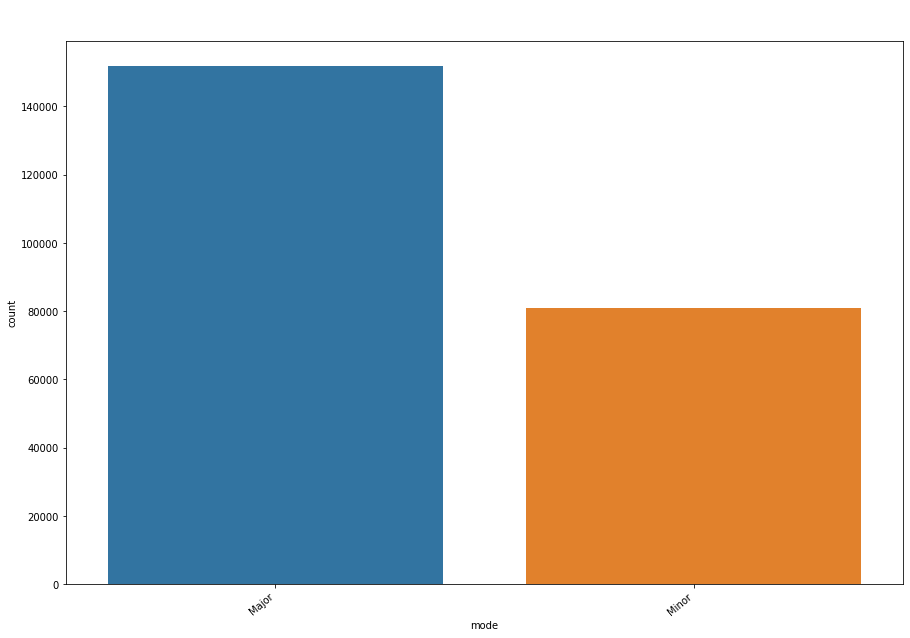

In [17]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='mode',
              data=df, 
             order=df['mode'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Genre",fontsize=35,color="white")
plt.show()

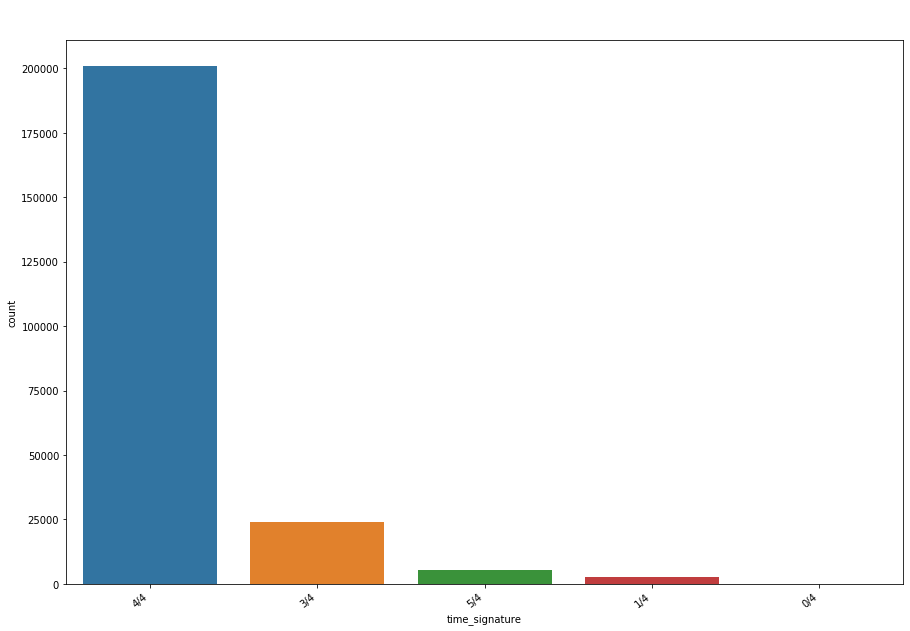

In [18]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='time_signature',
              data=df, 
             order=df['time_signature'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Genre",fontsize=35,color="white")
plt.show()

In [19]:
#Majority of songs are in the 4/4 time signature so It will likely not be useful in the model

In [20]:
#Cheking for correlation between attributes
def corr_heatmap(data):
    corr_matrix = data.corr()
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    f, ax = plt.subplots(figsize=(11, 15)) 
    heatmap = sns.heatmap(corr_matrix, 
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4, 
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          vmin = -1, 
                          vmax = 1,
                          annot = True,
                          annot_kws = {'size': 12})#add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

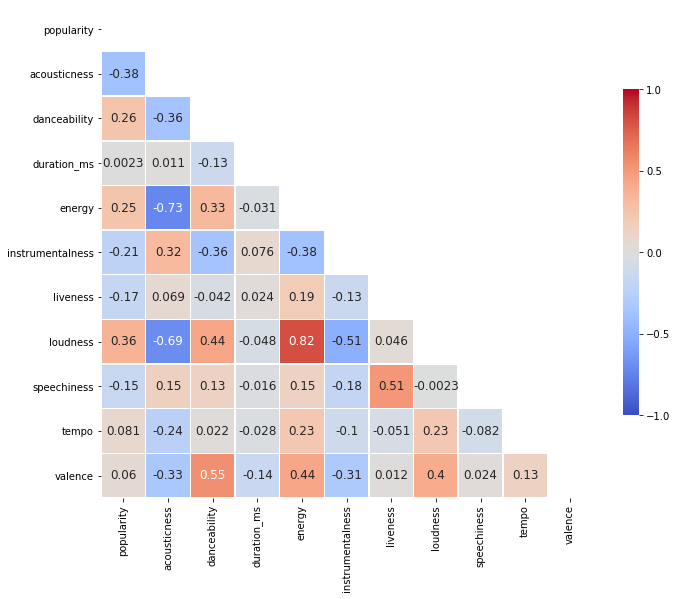

In [21]:
corr_heatmap(df)

# Reducing Data Size

In [22]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [23]:
#Taking the 150 most popular songs from each genre to make a new dataframe with equal amount of songs from each genre

df3 = df[df['genre'] == 'Soundtrack'].sort_values('popularity',ascending=False)[0:150]
df4 = df[df['genre'] == 'Indie'].sort_values('popularity',ascending=False)[0:150]
df5 = df[df['genre'] == 'Jazz'].sort_values('popularity',ascending=False)[0:150]
df6 = df[df['genre'] == 'Pop'].sort_values('popularity',ascending=False)[0:150]
df7 = df[df['genre'] == 'Electronic'].sort_values('popularity',ascending=False)[0:150]
df8 = df[df['genre'] == 'Children’s Music'].sort_values('popularity',ascending=False)[0:150]
df9 = df[df['genre'] == 'Folk'].sort_values('popularity',ascending=False)[0:150]
df10 = df[df['genre'] == 'Hip-Hop'].sort_values('popularity',ascending=False)[0:150]
df11 = df[df['genre'] == 'Rock'].sort_values('popularity',ascending=False)[0:150]
df12 = df[df['genre'] == 'Alternative'].sort_values('popularity',ascending=False)[0:150]
df13 = df[df['genre'] == 'Classical'].sort_values('popularity',ascending=False)[0:150]
df14 = df[df['genre'] == 'Rap'].sort_values('popularity',ascending=False)[0:150]
df15 = df[df['genre'] == 'World'].sort_values('popularity',ascending=False)[0:150]
df16 = df[df['genre'] == 'Soul'].sort_values('popularity',ascending=False)[0:150]
df17 = df[df['genre'] == 'Blues'].sort_values('popularity',ascending=False)[0:150]
df18 = df[df['genre'] == 'R&B'].sort_values('popularity',ascending=False)[0:150]
df19 = df[df['genre'] == 'Anime'].sort_values('popularity',ascending=False)[0:150]
df20 = df[df['genre'] == 'Reggaeton'].sort_values('popularity',ascending=False)[0:150]
df21 = df[df['genre'] == 'Ska'].sort_values('popularity',ascending=False)[0:150]
df22 = df[df['genre'] == 'Reggae'].sort_values('popularity',ascending=False)[0:150]
df23 = df[df['genre'] == 'Dance'].sort_values('popularity',ascending=False)[0:150]
df24 = df[df['genre'] == 'Country'].sort_values('popularity',ascending=False)[0:150]
df25 = df[df['genre'] == 'Opera'].sort_values('popularity',ascending=False)[0:150]
df26 = df[df['genre'] == 'Movie'].sort_values('popularity',ascending=False)[0:150]
df27 = df[df['genre'] == "Children's Music"].sort_values('popularity',ascending=False)[0:150]

#I removed comedy and a capella from the data set. a cappella was too small and comedy was not applicable to musical song recommendation.


In [24]:
frames = [df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27]
df = pd.concat(frames)


In [25]:
df.shape

(3750, 18)

In [26]:
df.size

67500

In [27]:
df['genre'].value_counts()

Folk                150
Ska                 150
Reggae              150
Alternative         150
Rap                 150
World               150
Electronic          150
R&B                 150
Jazz                150
Movie               150
Hip-Hop             150
Country             150
Opera               150
Indie               150
Reggaeton           150
Soundtrack          150
Rock                150
Pop                 150
Blues               150
Classical           150
Children's Music    150
Soul                150
Children’s Music    150
Anime               150
Dance               150
Name: genre, dtype: int64

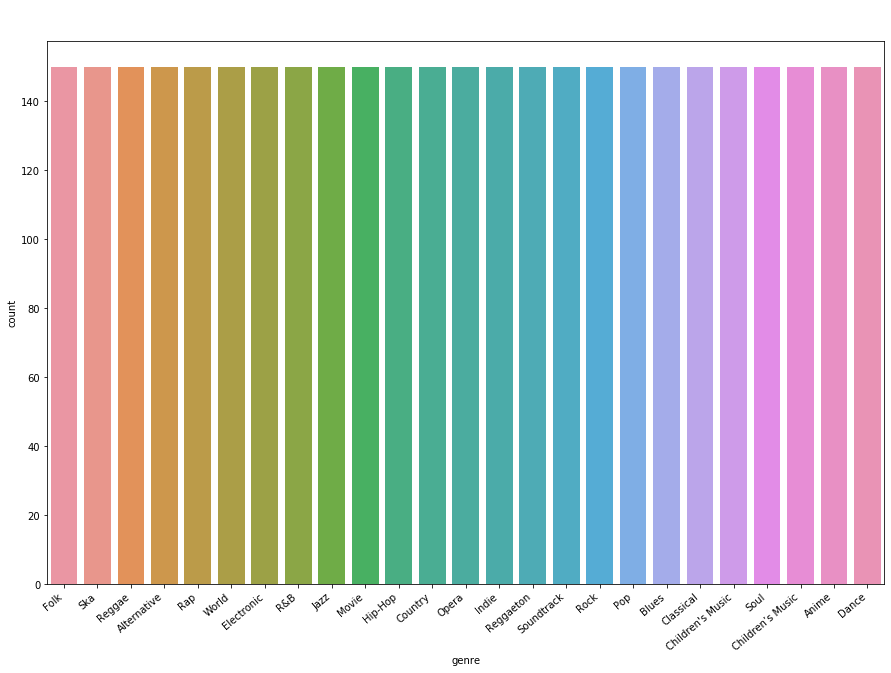

In [28]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x='genre',
              data=df, 
             order=df['genre'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.title("Genre",fontsize=35,color="white")
plt.show()

In [29]:
#With equal amounts of songs in each genre and less total songs overall, the data is much more suitable for agglomorative clustering

# Cleaning

Initally I thought that adding in attributes like key and genre would make the model more accurate but after testing different combinations of categorical variables in my model they didnt prove to enhance accuracy and I think in some cases made the clustering even less effective. When looking at genre in particular, I argue that it didnt help make song recommendations more accurate becuase songs can be in more than one genre in this data set. Also songs with completely differnt acoustic attributes can be considered to be in the same genere which makes clustering songs by genere not very useful.

In [30]:
dfd = pd.get_dummies(df, columns=['key'])
dfd.head(3)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
197505,Soundtrack,Hans Zimmer,Time,6ZFbXIJkuI1dVNWvzJzown,72,0.155,0.221,275547,0.0879,0.698,...,0,0,0,0,0,0,0,0,1,0
197504,Soundtrack,Max Richter,A Catalogue Of Afternoons,42c1ppLBsSbUjFNDzYLY10,72,0.996,0.124,110880,0.0924,0.848,...,1,0,0,0,0,0,0,0,0,0
197509,Soundtrack,Hans Zimmer,Cornfield Chase,15WRWc3qqlyAzTne9q5tQK,68,0.948,0.330,126960,0.2290,0.973,...,0,0,0,0,0,0,0,0,0,0


In [31]:
dfd.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'mode', 'speechiness',
       'tempo', 'time_signature', 'valence', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#'],
      dtype='object')

In [32]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

After testing combinations of one hotted categorical variables with no noteworthy improvements, 
I chose to continue on to my final model with a select group of continuous variables that included 
acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity'

# AHC Clustering 

In [33]:
featureset = df[['acousticness','danceability','energy','instrumentalness','liveness','loudness',
                 'speechiness','tempo','valence','popularity']]

#Final Model does not inlcue the original attributes of genre, artist_name, track_name, track_id, duration_ms, mode, time_signature, and key

In [34]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[1.55613588e-01, 1.77278264e-01, 8.70204114e-02, 7.03629032e-01,
        7.15613383e-02, 5.79300040e-01, 2.07507269e-02, 4.97433983e-01,
        1.83877000e-02, 6.16438356e-01],
       [1.00000000e+00, 6.98704462e-02, 9.15495793e-02, 8.54838710e-01,
        7.83767038e-02, 2.35390255e-01, 2.48480042e-02, 9.33118904e-01,
        1.16974860e-01, 6.16438356e-01],
       [9.51806721e-01, 2.97973646e-01, 2.29034985e-01, 9.80846774e-01,
        8.48822800e-02, 5.92234596e-01, 1.99577055e-02, 3.30223010e-01,
        3.83336796e-02, 5.61643836e-01],
       [9.98995973e-01, 4.93965231e-01, 2.36120617e-02, 9.38508065e-01,
        7.93060719e-02, 2.20821368e-01, 2.44514935e-02, 6.25619549e-01,
        1.05547476e-01, 5.47945205e-01],
       [7.96182590e-01, 6.86634924e-01, 3.35722050e-01, 3.41733871e-06,
        2.76125568e-01, 6.92419042e-01, 1.48030663e-02, 4.38489700e-01,
        5.29399543e-01, 5.47945205e-01]])

In [35]:
#Clustering using Scipy
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

/Users/BenSizelove/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  after removing the cwd from sys.path.


In [36]:
agglom = AgglomerativeClustering(n_clusters = 11, linkage = 'ward')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 0, 0, ..., 7, 5, 5])

In [37]:
df['cluster_'] = agglom.labels_
df.head(2)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster_
197505,Soundtrack,Hans Zimmer,Time,6ZFbXIJkuI1dVNWvzJzown,72,0.155,0.221,275547,0.0879,0.698,G,0.0869,-16.996,Major,0.0381,126.622,4/4,0.0401,0
197504,Soundtrack,Max Richter,A Catalogue Of Afternoons,42c1ppLBsSbUjFNDzYLY10,72,0.996,0.124,110880,0.0924,0.848,B,0.0935,-31.726,Major,0.0412,205.999,5/4,0.1350,0


# Cluster Examination and Examples

## Before Genre Sampling

I ran the model a few times without having an equal amount of songs of each genre and there was an oversampling of songs from the 'pop' genre 

First Model Iteration before genre sampling Declaring 13 cluster using variables 
popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence. 

Results: I think that the accuraccy is pretty good. Looking at clusters, like cluster 13, a lot of the songs were very similar in style. Mostly spanish music cluster.

Second Model iteration before genre sampling Declaring 10 clusters using the variables of popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence.

Results: Better than previous test and Best iteration without genre sampmpling.

The majority of the songs in these were dominated by popular songs only and it didnt offer a wide range of recommendations

## After Genre Sampling

After sampling the 150 most popular songs from each genre excluding comedy and a capella, the clustering was a lot more accurate 
and includes many different genres where as before clustering was dominated by popular genres like 'pop'. 
While there was more accuracy with the songs clusterd, there are a lot less songs so there is a constraint on the 
amount of songs the user can be recommended. If I were do do another model I would increase samplings size. With this 
type of clustering there is a limitation on the size of the data set and clustering many songs takes a lot of time and processing power. 

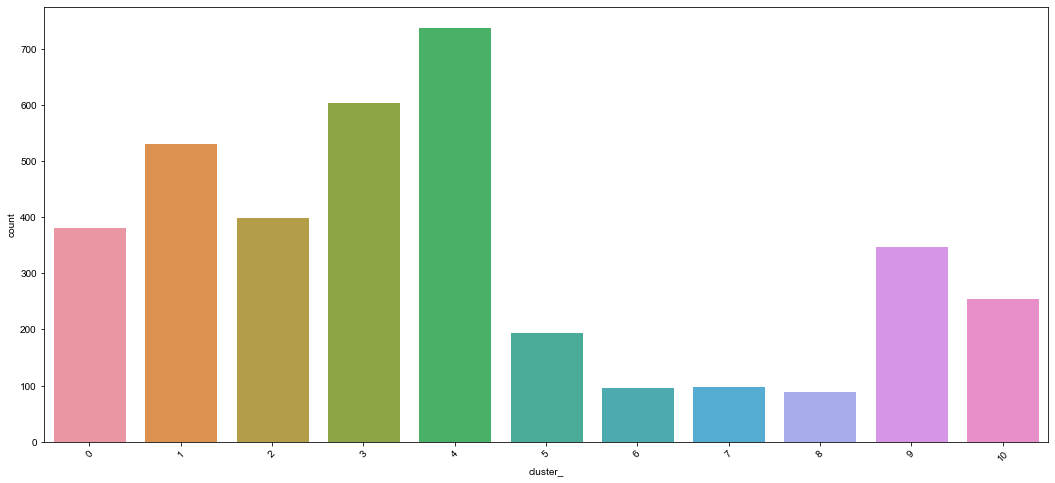

In [38]:
bar_cols = df[['cluster_']].columns.values
for col in bar_cols:
    df_temp = df.groupby([col]).size().reset_index(name='count')
    plt.figure(figsize=(18,8))
    plt.xticks(rotation=45)
    sns.set_style("ticks")
    sns.barplot(data = df_temp, x= col, y= 'count')

## Test Recommendation

In [39]:
#See List of Artist Songs
artist = input("Enter Artist Name: ") 
artist_songs = df[df['artist_name']== artist]
artist_songs

Enter Artist Name: Adele


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster_
191941,Soul,Adele,Someone Like You,4kflIGfjdZJW4ot2ioixTB,79,0.89200,0.559,285040,0.330,0.000000,A,0.0975,-8.251,Major,0.0285,135.109,4/4,0.2850,1
191945,Soul,Adele,Make You Feel My Love,6P7tTFzn6oNa0GL8w8oazE,75,0.89400,0.552,212040,0.180,0.000393,A#,0.1050,-10.583,Major,0.0293,76.995,4/4,0.0896,5
191954,Soul,Adele,When We Were Young,7IWkJwX9C0J7tHurTD7ViL,74,0.34800,0.381,290907,0.594,0.000000,D#,0.0925,-5.970,Major,0.0486,143.860,4/4,0.2730,10
191962,Soul,Adele,Set Fire to the Rain,3CKCZ9pfwAfoMZlMncA1Nc,74,0.00382,0.610,241693,0.683,0.000002,D,0.1250,-3.879,Minor,0.0253,108.003,4/4,0.4660,3
191972,Soul,Adele,Rolling in the Deep,1CkvWZme3pRgbzaxZnTl5X,74,0.13100,0.729,228293,0.756,0.000000,G#,0.0527,-5.119,Major,0.0294,104.945,4/4,0.5220,4
191970,Soul,Adele,Send My Love (To Your New Lover),4BHzQ9C00ceJxfG16AlNWb,73,0.04150,0.690,223080,0.524,0.000003,F#,0.1700,-8.390,Minor,0.1030,164.023,4/4,0.5620,4
191981,Soul,Adele,Hello,4sPmO7WMQUAf45kwMOtONw,72,0.33600,0.481,295493,0.451,0.000000,F,0.0872,-6.095,Minor,0.0347,157.966,4/4,0.2890,10
191980,Soul,Adele,All I Ask,1wMALZpuqAy7amQsFBWQ8m,71,0.88200,0.587,271800,0.283,0.000000,E,0.1490,-5.473,Major,0.0279,141.961,4/4,0.3430,1
191989,Soul,Adele,Water Under the Bridge,4vb4mFvYsr2h6enhjJsq9Y,70,0.01890,0.596,240427,0.838,0.000015,F,0.1080,-6.520,Minor,0.0704,94.982,4/4,0.4720,2


In [40]:
#Making a playlist off of a song recommendation
artist = input("Enter Artist Name: ") 
song = input("Enter Song Name: ") 

artist_songs = df[df['artist_name']== artist ]
artist_songs
song_name = artist_songs[artist_songs['track_name']== song ]

clust_num = song_name.head(1).cluster_
num = clust_num.values[0]

playlist = df[df.cluster_ == num]
sp = playlist.drop_duplicates(subset='track_name', keep='first')
sp.sort_values('popularity',ascending=False).head(20)

Enter Artist Name: Adele
Enter Song Name: Hello


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster_
107845,Pop,The Chainsmokers,Who Do You Love (with 5 Seconds of Summer),11cDEev79fPKi6uJCjUhu8,92,0.007910,0.510,226747,0.835,0.000000,D#,0.2190,-4.673,Major,0.0447,140.024,4/4,0.4350,10
166066,Rock,Imagine Dragons,Bad Liar,2RSHsoi04658QL5xgQVov3,90,0.072200,0.383,260773,0.637,0.000000,D#,0.3680,-6.993,Major,0.0703,177.913,4/4,0.0827,10
166062,Rock,Imagine Dragons,Thunder,1zB4vmk8tFRmM9UULNzbLB,88,0.006710,0.605,187147,0.822,0.134000,C,0.1470,-4.833,Major,0.0438,167.997,4/4,0.2880,10
92825,Indie,YUNGBLUD,11 Minutes (with Halsey feat. Travis Barker),4mGdjNMo0RonTlOEb7cYg4,87,0.011600,0.464,239507,0.852,0.000000,B,0.1080,-3.804,Major,0.0670,160.075,4/4,0.2330,10
108022,Pop,Lukas Graham,Love Someone,2JqnpexlO9dmvjUMCaLCLJ,86,0.161000,0.550,205463,0.415,0.000000,A,0.1080,-6.557,Minor,0.0520,172.065,4/4,0.2740,10
66670,Hip-Hop,Eminem,'Till I Collapse,4xkOaSrkexMciUUogZKVTS,85,0.075700,0.572,297893,0.853,0.000000,C#,0.0798,-3.203,Major,0.2170,171.297,4/4,0.1020,10
87007,Rap,Travis Scott,STARGAZING,7wBJfHzpfI3032CSD7CE2m,84,0.009470,0.487,270715,0.789,0.000004,G#,0.1890,-3.690,Major,0.0440,150.007,4/4,0.0564,10
87434,Rap,The Weeknd,Call Out My Name,4MPTj8lMMvxLwT3EwuXFop,83,0.211000,0.449,228373,0.599,0.000000,C#,0.3270,-4.892,Major,0.0369,134.144,3/4,0.1650,10
13778,Dance,James Arthur,Empty Space,1uru26I2JKd2mQZt0MDCUe,82,0.215000,0.404,214227,0.531,0.000000,C#,0.0521,-4.328,Major,0.1030,164.848,4/4,0.3210,10
13789,Dance,James Arthur,Naked,7krbSH3rd8lhIZvuzTV3Bl,82,0.104000,0.529,234107,0.607,0.000000,F#,0.0631,-6.781,Major,0.0574,101.966,4/4,0.2380,10


# Cluster Descriptions

### How I describe the different clusters

### -Cluster 0: Instrumentals
### -Cluster 1: Slower and more relaxed pop songs ~ the feels
### -Cluster 2: Softer rock style songs 
### -Cluster 3: Relaxed and more upbeat pop songs
### -Cluster 4: Upbeat and rythmic latin influenced songs
### -Cluster 5: Soft acoustics
### -Cluster 6: Electronic/Rock
### -Cluster 7: Anime/Childrens songs
### -Cluster 8: Faster pace less popular songs
### -Cluster 9: Popular Rap songs
### -Cluster 10: More agressive and serious feeling pop songs

In [43]:
playlist = df[df.cluster_ == 4]
sp = playlist.drop_duplicates(subset='track_name', keep='first')
sp.sort_values('popularity',ascending=False).head(25)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,cluster_
107909,Pop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,98,0.11000,0.737,193227,0.860,0.000002,G#,0.0574,-2.652,Minor,0.0593,93.989,4/4,0.656,4
107812,Pop,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,97,0.19100,0.687,214290,0.792,0.000000,F,0.1670,-2.749,Major,0.0452,100.015,4/4,0.671,4
107829,Pop,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,97,0.06910,0.719,187436,0.704,0.000000,C#,0.1660,-4.724,Major,0.0476,133.002,4/4,0.628,4
107851,Pop,DJ Snake,"Taki Taki (with Selena Gomez, Ozuna & Cardi B)",4w8niZpiMy6qz1mntFA5uM,96,0.15300,0.841,212500,0.798,0.000003,C#,0.0618,-4.206,Minor,0.2290,95.948,4/4,0.591,4
66741,Hip-Hop,Paulo Londra,Adan y Eva,6FyRXC8tJUh863JCkyWqtk,95,0.32300,0.767,258639,0.709,0.000000,C#,0.0676,-4.470,Major,0.3360,171.993,4/4,0.720,4
107838,Pop,Panic! At The Disco,High Hopes,1rqqCSm0Qe4I9rUvWncaom,95,0.19300,0.579,190947,0.904,0.000000,F,0.0640,-2.729,Major,0.0618,82.014,4/4,0.681,4
138917,Reggaeton,Ozuna,Baila Baila Baila,7uH27oIt4a6cIFCA8ZPcyG,95,0.03610,0.816,158400,0.754,0.000000,B,0.2170,-2.750,Minor,0.1110,99.966,4/4,0.533,4
107816,Pop,Jonas Brothers,Sucker,4y3OI86AEP6PQoDE6olYhO,94,0.04360,0.846,181040,0.731,0.000000,C#,0.0949,-5.027,Minor,0.0640,137.947,4/4,0.933,4
107807,Pop,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446,4
107917,Pop,Calvin Harris,Giant (with Rag'n'Bone Man),5itOtNx0WxtJmi1TQ3RuRd,94,0.01600,0.807,229184,0.887,0.000503,C#,0.0811,-4.311,Minor,0.0361,122.015,4/4,0.606,4


In [44]:
df.groupby('cluster_').mean()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
cluster_,,,,,,,,,,,
0,57.130548,0.882587,0.298614,251413.736292,0.150699,0.856796,0.136349,-21.835191,0.044502,101.153441,0.160004
1,67.073171,0.715047,0.543921,218411.911820,0.426391,0.019277,0.213853,-10.194094,0.067301,122.073977,0.472256
2,67.426434,0.047125,0.529716,229657.563591,0.850564,0.006563,0.192014,-4.746025,0.065772,128.667965,0.551676
3,75.758678,0.331110,0.639149,226252.380165,0.558936,0.005229,0.137344,-7.485140,0.086587,109.508625,0.465017
4,75.412720,0.098951,0.712591,222598.309878,0.726816,0.007689,0.152805,-6.069632,0.085998,124.267740,0.728788
5,49.510204,0.913959,0.371148,220860.678571,0.163349,0.029937,0.137917,-16.360301,0.045895,92.868061,0.235621
6,63.632653,0.089542,0.600694,250630.418367,0.663551,0.656520,0.179618,-8.430306,0.064705,123.105439,0.422050
7,34.606061,0.436332,0.777980,133019.050505,0.506313,0.000960,0.168798,-9.399778,0.090869,126.975919,0.819576
8,67.395604,0.068558,0.571495,274098.065934,0.745736,0.014144,0.721890,-6.152626,0.072954,119.805593,0.496822


# Findings and Conclusions

## - Agglomerative/Hierarchical clustering proved to be the best clustering algorithm for song recommendations
## - When using agglomerative clustering, data size needs to be accounted for because it is resource intensive to custer many different rows of songs with a large number of attributes
## - Clustering songs for recommendation performs better when there are an equal amount of each genre. This allows for one genre to not dominate the clustering as 'pop' normally would when including popularity as a variable because there are so many popular songs in the genre of 'pop'.
## - Categorical attributes such as genre are not as helpful for song recommendations becuase there are many different styles of songs in each genre so it would be limiting potentail songs a user would like.
## -  This system would work better if it was able to process larger data size. A users song preferences would be better supported and each individual cluster would be populated with a lot more reccomendations. 
## - Next step would be to experiment with other models that could provide recommendations with large data sets.
## - It is hard to test the accuracy of a clustering model like this because a user's preferences are entirely unique. But in my opinion this model did a good job at clustering songs of the similar vibe, mood, and feeling. 
